In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# STEP 1: Load the dataset
# Reads the 'bmi.csv' file from the 'data' folder into a pandas DataFrame
df = pd.read_csv('data/bmi.csv')

In [5]:
# Display the first 5 rows of the DataFrame to preview the dataset
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [7]:
# Generate descriptive statistics for numerical columns
# Includes count, mean, standard deviation, min, quartiles, and max
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [9]:
# Display concise summary of the DataFrame
# Shows column names, data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [11]:
# Check for missing values in each column and display the total count per column
df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [13]:
# Display all duplicate rows in the DataFrame
# keep=False marks all occurrences of duplicates as True (not just the first or last)
df[df.duplicated(keep=False)]

,Gender,Height,Weight,Index
3,Female,195,104,3
8,Male,174,90,3
72,Male,141,80,5
138,Male,171,147,5
141,Female,167,85,4
156,Female,182,84,3
181,Male,177,117,4
187,Female,182,84,3
217,Female,142,86,5
242,Male,191,62,1


In [17]:
# Remove duplicate rows from the DataFrame
# Loop through the index of duplicate rows and drop them in place
for index in df[df.duplicated()].index:
    df.drop(index, inplace=True)

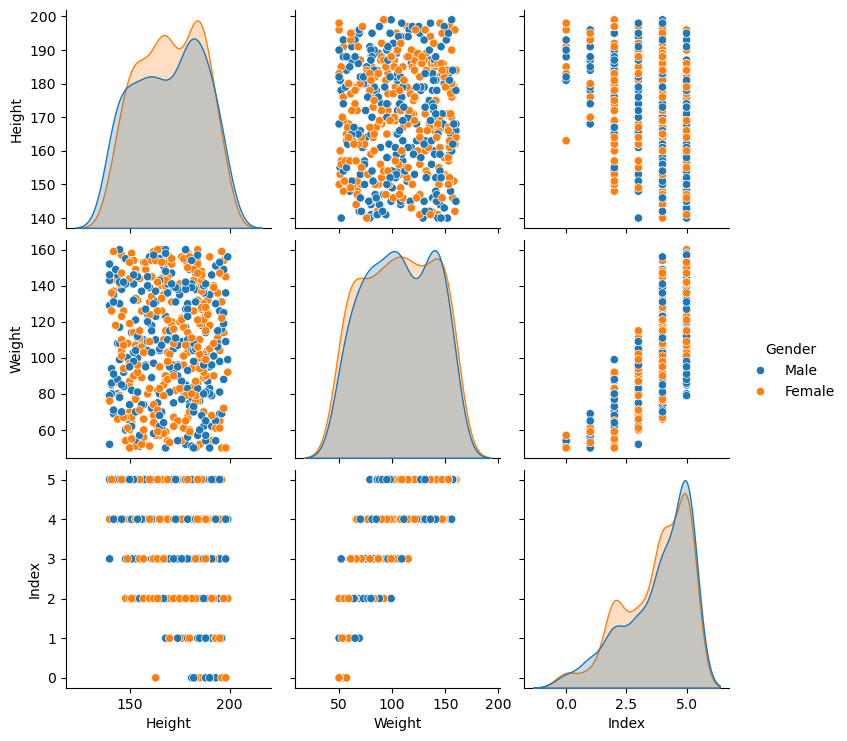

In [19]:
# STEP 2: Exploratory Data Analysis
# Create pairwise scatter plots for all numerical columns, color-coded by 'Gender'
sns.pairplot(df, hue='Gender')

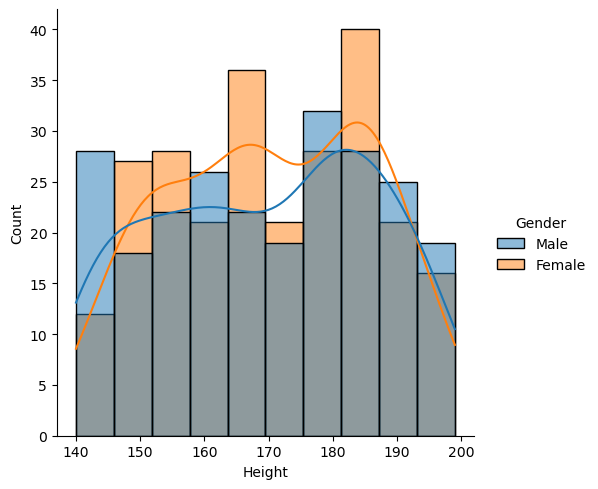

In [21]:
# Plot the distribution of the 'Height' column, separated by 'Gender'
# 'kde=True' adds a smooth density curve to each histogram
# Helps visualize differences in height distribution between genders
sns.displot(x='Height', hue='Gender', data=df, kde=True)

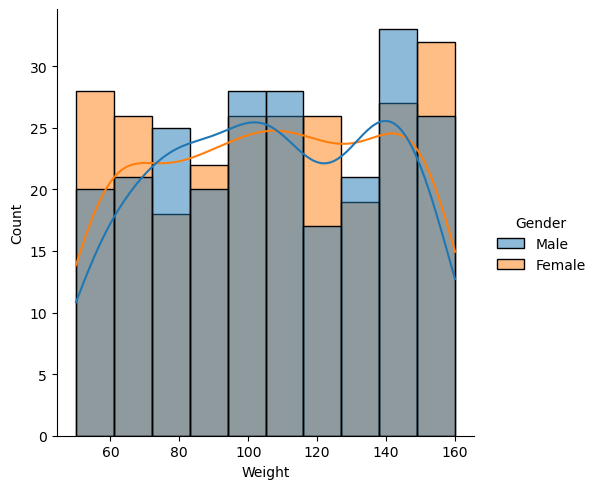

In [23]:
# Plot the distribution of the 'Weight' column, separated by 'Gender'
# 'kde=True' adds smooth density curves for each gender
# Useful to compare weight distributions between males and females
sns.displot(x='Weight', hue='Gender', data=df, kde=True)

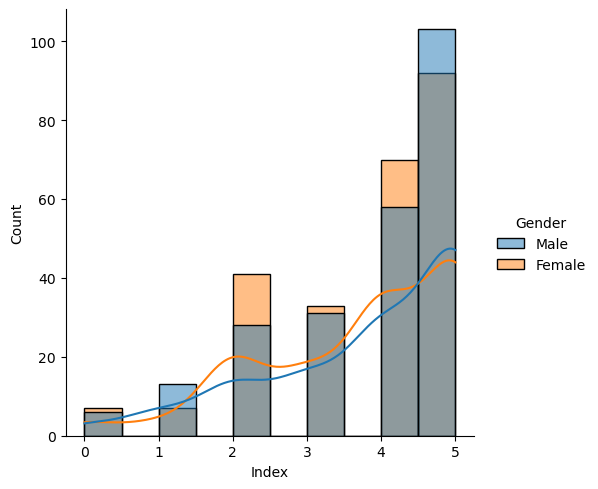

In [25]:
# Plot the distribution of the 'Index' column, separated by 'Gender'
# 'kde=True' adds smooth density curves for each gender
# Note: Using an index column in a distribution plot is unusual; typically used for numeric features like Height or Weight
sns.displot(x='Index', hue='Gender', data=df, kde=True)

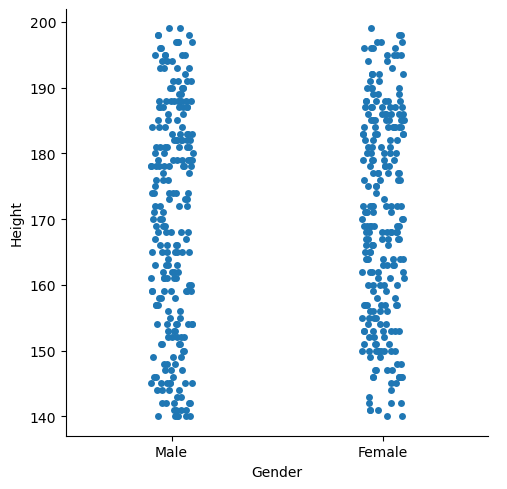

In [27]:
# Create a categorical plot showing the distribution of 'Height' for each 'Gender'
# This helps compare average heights and spread between males and females
sns.catplot(x='Gender', y='Height', data=df)


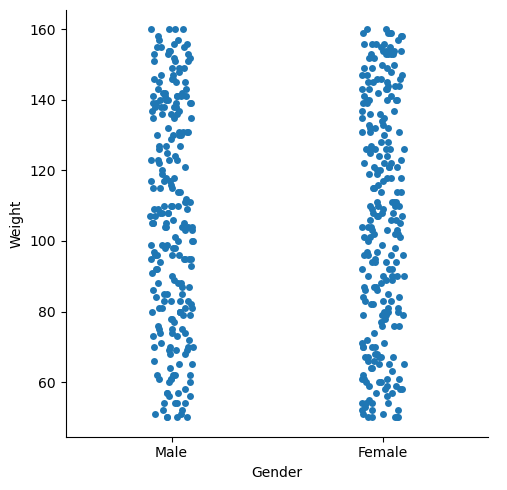

In [29]:
# Create a categorical plot showing the distribution of 'Weight' for each 'Gender'
# Useful to compare average weight and variability between males and females
sns.catplot(x='Gender', y='Weight', data=df)

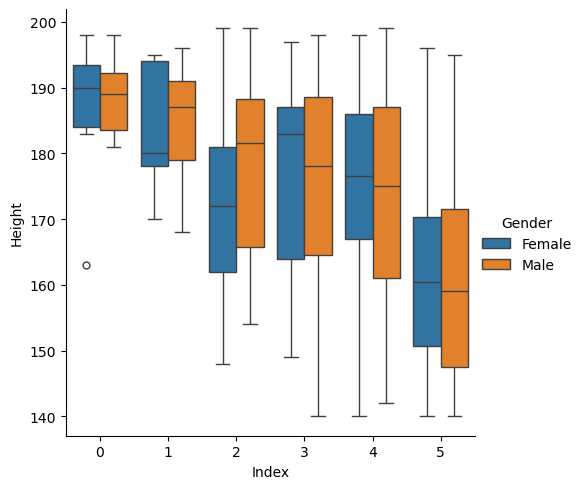

In [31]:
# Create a box plot of 'Height' for each 'Index', separated by 'Gender'
# Box plots show median, quartiles, and potential outliers
# Hue='Gender' allows comparison between males and females at each index
sns.catplot(x='Index', y='Height', hue='Gender', kind='box', data=df)

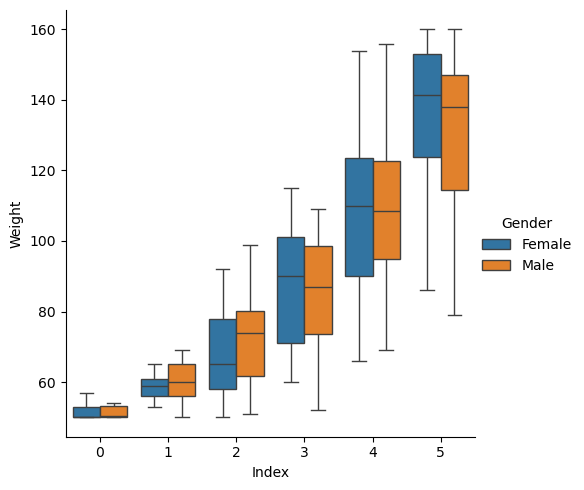

In [33]:
# Create a box plot of 'Weight' for each 'Index', separated by 'Gender'
# Box plots display median, quartiles, and outliers
# Hue='Gender' allows comparison between male and female weights at each index
sns.catplot(x='Index', y='Weight', hue='Gender', kind='box', data=df)

<Axes: xlabel='Index', ylabel='Height'>

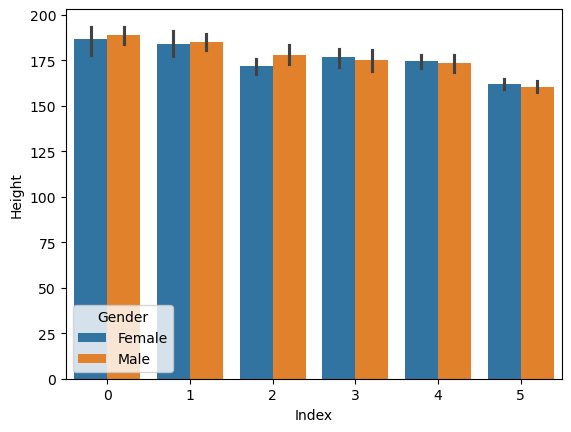

In [35]:
# Create a bar plot showing the average 'Height' for each 'Index', separated by 'Gender'
# Each bar represents the mean height of that index, with hue showing male vs female
sns.barplot(x='Index', y='Height', hue='Gender', data=df)

<Axes: xlabel='Index', ylabel='Weight'>

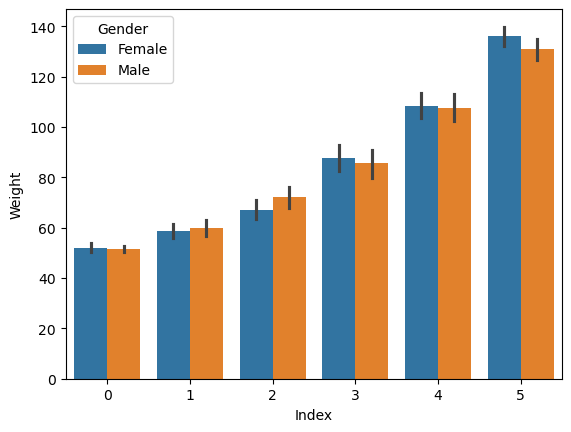

In [37]:
# Create a bar plot showing the average 'Weight' for each 'Index', separated by 'Gender'
# Each bar represents the mean weight at that index, with hue distinguishing male vs female
sns.barplot(x='Index', y='Weight', hue='Gender', data=df)

<Axes: xlabel='Index', ylabel='count'>

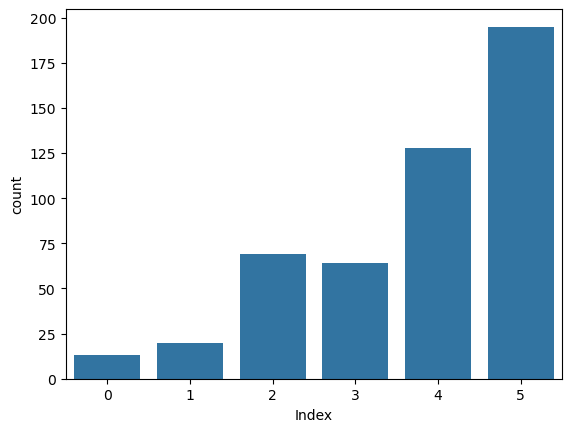

In [39]:
# Create a count plot showing the number of occurrences for each 'Index' value
# Useful for seeing the distribution of rows per index
# Note: If 'Index' is just row numbers, this plot may not provide meaningful insights
sns.countplot(x='Index', data=df)

In [72]:
#STEP 3: FEATURE ENGINEERING

In [41]:
# Re-map 'Index' values to combine categories
# Original indices 0,1,2 are mapped to 0; 3,4,5 are mapped to 1
# This simplifies the 'Index' column into two broader groups
df['Index'] = df['Index'].map({0:0, 1:0, 2:0, 3:1, 4:1, 5:1})

In [43]:
# Convert the 'Gender' categorical column into numeric dummy variables
# drop_first=True drops one column to avoid multicollinearity
# The resulting 'gender' variable will be 1 for the second category (e.g., Male) and 0 for the first (e.g., Female)
gender = pd.get_dummies(df['Gender'], drop_first=True)


In [78]:
#check cell 5
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,1
1,Male,189,87,0
2,Female,185,110,1
3,Female,195,104,1
4,Male,149,61,1


In [45]:
# Concatenate the dummy variables with the original DataFrame
# axis=1 means adding the new columns horizontally
df = pd.concat([df, gender], axis=1)

In [82]:
df.head()

,Gender,Height,Weight,Index,Male
0,Male,174,96,1,True
1,Male,189,87,0,True
2,Female,185,110,1,False
3,Female,195,104,1,False
4,Male,149,61,1,True


In [47]:
# Concatenate the dummy variables with the original DataFrame
# axis=1 means adding the new columns horizontally
df = pd.concat([df, gender], axis=1)

In [86]:
df.head()

,Height,Weight,Index,Male
0,174,96,1,True
1,189,87,0,True
2,185,110,1,False
3,195,104,1,False
4,149,61,1,True


In [49]:
# Import libraries for model training
# train_test_split: to split data into training and testing sets
# LogisticRegression: to create and train a logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [51]:
# Display the proportion of each class in the 'Index' column
# normalize=True shows percentages instead of raw counts
df['Index'].value_counts(normalize=True)

Index
1    0.791411
0    0.208589
Name: proportion, dtype: float64

In [67]:
# Prepare input features (X) and target variable (y) for Logistic Regression
# X includes 'Male' (dummy variable), 'Weight', and 'Height'
# y is the 'Index' column representing the target classes
x = df[['Male', 'Weight', 'Height']]
y = df['Index']


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [70]:
# Split the data into training and testing sets
# 33% of the data is reserved for testing, 67% for training
# random_state=42 ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [74]:
# Initialize the Logistic Regression model
log = LogisticRegression()

# Train the model on the training data
log.fit(x_train, y_train)

LogisticRegression()

In [76]:
# Compute the accuracy of the Logistic Regression model on the training data
# Measures the proportion of correctly predicted labels in the training set
log.score(x_train, y_train)

0.9663608562691132

In [80]:
# Compute the accuracy of the Logistic Regression model on the test data
# Measures the proportion of correctly predicted labels in the unseen test set
log.score(x_test, y_test)

0.9814814814814815

In [86]:
# STEP 5: Interpret model coefficients
# Display the contribution of each feature to the prediction
# Positive coefficients increase the likelihood of class 1, negative decrease it
pd.DataFrame(log.coef_[0], index=x.columns, columns=['Coefficient'])

,Coefficient
Male,0.279870
Male,0.279870
Weight,0.310081
Height,-0.260740


In [88]:
# Predict the probabilities for each class for the test set
# Each row shows the probability of belonging to class 0 and class 1
log.predict_proba(x_test)

array([[2.21725404e-06, 9.99997783e-01],
       [1.25950036e-07, 9.99999874e-01],
       [1.55253588e-12, 1.00000000e+00],
       [5.32437900e-05, 9.99946756e-01],
       [2.15448104e-10, 1.00000000e+00],
       [9.99349006e-01, 6.50993905e-04],
       [4.68771733e-09, 9.99999995e-01],
       [6.00855145e-08, 9.99999940e-01],
       [9.98992753e-01, 1.00724729e-03],
       [5.78643467e-01, 4.21356533e-01],
       [1.41188110e-04, 9.99858812e-01],
       [5.12367926e-12, 1.00000000e+00],
       [4.00346423e-12, 1.00000000e+00],
       [1.42213483e-04, 9.99857787e-01],
       [1.77732695e-09, 9.99999998e-01],
       [9.56357753e-01, 4.36422473e-02],
       [1.19348975e-11, 1.00000000e+00],
       [5.48157806e-06, 9.99994518e-01],
       [3.11096178e-02, 9.68890382e-01],
       [3.52695650e-12, 1.00000000e+00],
       [2.42024596e-06, 9.99997580e-01],
       [8.45933425e-06, 9.99991541e-01],
       [6.41430841e-07, 9.99999359e-01],
       [5.42195365e-01, 4.57804635e-01],
       [2.085163

In [90]:
# Predict the probabilities for each class for the test set
# Each row shows the probability of belonging to class 0 and class 1
log.predict_proba(x_test)

array([[2.21725404e-06, 9.99997783e-01],
       [1.25950036e-07, 9.99999874e-01],
       [1.55253588e-12, 1.00000000e+00],
       [5.32437900e-05, 9.99946756e-01],
       [2.15448104e-10, 1.00000000e+00],
       [9.99349006e-01, 6.50993905e-04],
       [4.68771733e-09, 9.99999995e-01],
       [6.00855145e-08, 9.99999940e-01],
       [9.98992753e-01, 1.00724729e-03],
       [5.78643467e-01, 4.21356533e-01],
       [1.41188110e-04, 9.99858812e-01],
       [5.12367926e-12, 1.00000000e+00],
       [4.00346423e-12, 1.00000000e+00],
       [1.42213483e-04, 9.99857787e-01],
       [1.77732695e-09, 9.99999998e-01],
       [9.56357753e-01, 4.36422473e-02],
       [1.19348975e-11, 1.00000000e+00],
       [5.48157806e-06, 9.99994518e-01],
       [3.11096178e-02, 9.68890382e-01],
       [3.52695650e-12, 1.00000000e+00],
       [2.42024596e-06, 9.99997580e-01],
       [8.45933425e-06, 9.99991541e-01],
       [6.41430841e-07, 9.99999359e-01],
       [5.42195365e-01, 4.57804635e-01],
       [2.085163

In [92]:
# Import evaluation metrics for classification
# - classification_report: precision, recall, f1-score, support for each class
# - confusion_matrix: shows true vs predicted labels
# - RocCurveDisplay: plots the ROC curve to evaluate model performance
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay

In [94]:
# Generate predicted class labels for the test set
predictions = log.predict(x_test)

In [96]:
# Print a detailed classification report for the test set
# Includes precision, recall, f1-score, and support for each class
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        39
           1       1.00      0.98      0.99       123

    accuracy                           0.98       162
   macro avg       0.96      0.99      0.98       162
weighted avg       0.98      0.98      0.98       162



<Axes: >

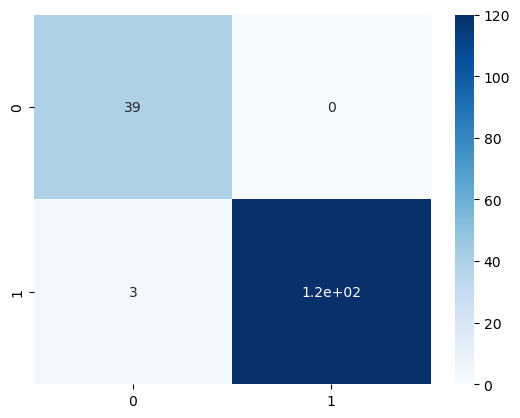

In [98]:
# Plot a heatmap of the confusion matrix for the test set predictions
# Annot=True displays the count of correct and incorrect predictions in each cell
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='Blues')

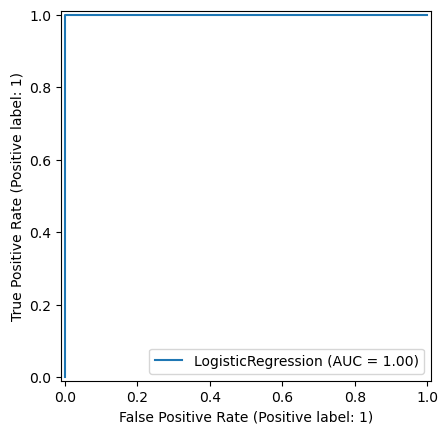

In [100]:
# Plot the ROC curve for the Logistic Regression model on the test set
# Helps visualize the trade-off between true positive rate and false positive rate
RocCurveDisplay.from_estimator(log, x_test, y_test)